In [ ]:
import numpy as np

unipc5_2 = np.load('/data/guided-diffusion/samples/128x128_diffusion/unipc_5_scale2.0_hist/images/samples_0.npz')
unipc200_2 = np.load('/data/guided-diffusion/samples/128x128_diffusion/unipc_200_scale2.0_hist/images/samples_0.npz')

unipc5_4 = np.load('/data/guided-diffusion/samples/128x128_diffusion/unipc_5_scale2.0_hist/images/samples_0.npz')
unipc200_4 = np.load('/data/guided-diffusion/samples/128x128_diffusion/unipc_200_scale2.0_hist/images/samples_0.npz')

unipc5_6 = np.load('/data/guided-diffusion/samples/128x128_diffusion/unipc_5_scale2.0_hist/images/samples_0.npz')
unipc200_6 = np.load('/data/guided-diffusion/samples/128x128_diffusion/unipc_200_scale2.0_hist/images/samples_0.npz')

unipc5_8 = np.load('/data/guided-diffusion/samples/128x128_diffusion/unipc_5_scale2.0_hist/images/samples_0.npz')
unipc200_8 = np.load('/data/guided-diffusion/samples/128x128_diffusion/unipc_200_scale2.0_hist/images/samples_0.npz')

unipc5_2_target, unipc5_2_model, unipc5_x0 = unipc5['hist_raw']
unipc200_target, unipc200_model, unipc200_x0 = unipc200['hist_raw']

import numpy as np

def interpolate(a, n):
    a = np.asarray(a).ravel()
    if n < 2:
        raise ValueError("n must be ≥ 2")
    if a.size == 1:
        return np.full(n, a[0], dtype=a.dtype)
    x_orig = np.linspace(0, 1, a.size)
    return np.interp(np.linspace(0, 1, n), x_orig, a)


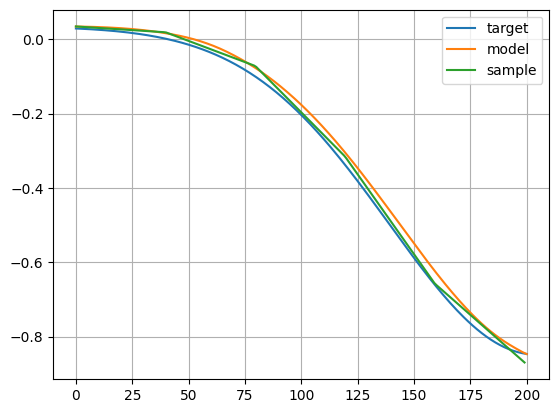

In [88]:
import matplotlib.pyplot as plt
i = 10
plt.plot(unipc200_target[:, i, 0, 64, 64], label='target')
plt.plot(unipc200_model[:, i, 0, 64, 64], label='model')
plt.plot(interpolate(unipc5_model[:, i, 0, 64, 64], 200), label='sample')
plt.grid()
plt.legend()
plt.show()

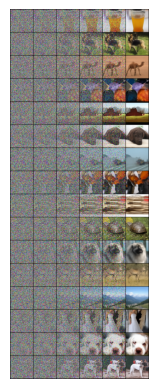

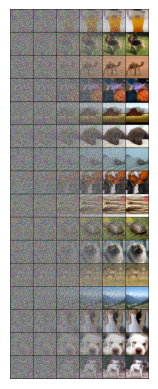

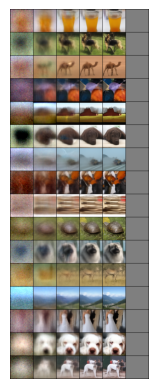

In [39]:
import numpy as np
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_traj(arr, every: int = 10, title: str | None = None) -> None:
    """
    (T, 16, 3, 128, 128) 형태의 numpy 또는 torch 배열을
    16 × (T/every) 격자로 시각화한다.
    """
    # numpy → torch 변환
    if isinstance(arr, np.ndarray):
        arr = torch.from_numpy(arr)

    # (T, 16, 3, H, W)  →  (cols, 16, 3, H, W)
    arr = arr[::every]
    cols = arr.shape[0]

    # (16, cols, 3, H, W) → (16*cols, 3, H, W)
    arr = arr.permute(1, 0, 2, 3, 4).reshape(-1, *arr.shape[2:])

    # [-1,1] 범위면 0–1로 변환
    if arr.min() < 0:
        arr = (arr.clamp(-1, 1) + 1) / 2

    grid = make_grid(arr.cpu(), nrow=cols, padding=2)
    plt.imshow(grid.permute(1, 2, 0)); plt.axis('off')
    if title:
        plt.title(title)
    plt.show()
    
show_traj(target_traj, every=1)
show_traj(model_traj, every=1)
show_traj(x0s, every=1)